# Pautas para el ejercicio de analisis de sentimiento en Twitter

2. Escoger tema y validarlo
3. Acotar las búsquedas y montar datasets
4. Limpiar datasets
5. Extraer el sentimiento de los textos, keywords,
nube de palabras, cualquier visualización útil
6. Hacer una presentación del tema

Vuestra primera misión es confirmar si el tema de ayer podéis utilizarlo

Para eso os recomiendo hacer varias búsquedas como decíamos intercambiando keywords con el mismo hashtags, con keywords que representan locations también.

Mi segunda recomendación es: una vez tengáis un primer dataset intentad completar el ciclo de limpiarlo y sacar la nube de palabras. Así ya al menos luego iréis más rápido y más confiados y cuando tengáis el definitivo ya sacáis todo lo demás: sentimiento, topics etc

Para la presentación os cuelgo un modelo en un rato en la carpeta de clase

https://python-graph-gallery.com/heatmap/

# Recopilar datos de twitter

## 04_grupal


In [ ]:
import tweepy #Libreria que hace de enganche con la app de twitter.
import csv

###incluye aqui tus claves unicas de Twitter
consumer_key = 'sHrgGa1ngzqSIqQ2y93h6rADU'
consumer_secret= 'QkrumSQdAdIRrwuOQD5UA2ncYYPIWnvZwffVXsiFuJ3GsL8jtn'
access_token= '308446058-dPQw8gsBuKvg4unf7TWHp7v99xWHA1HnUXcsY1DL' 
access_token_secret= 'JHV5bf9f0cvAmbDcAIgAQxcrOLNL0p9dfgz1wAw5JDOb9'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Crear fichero

In [ ]:
nombrefichero='BlackFriday_4nov.csv'
csvFile = open(nombrefichero, 'a')
csvWriter = csv.writer(csvFile)

## Realizar consulta

Te recomendamos que abras este enlace. Será útil para configurar consultas más complejas, filtrando por ejemplo tweets por usuario, o filtrar los dirigidos a un usuario en concreto o aquellos enviados desde una localización específica.

https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators

La variable query será la que contenga las palabras clave o hashtags o nombres de usuario que queremos buscar en Twitter. Si incluimos -filter:retweets evitaremos que aparezcan tweets con el mismo texto en nuestro dataset.

Añade también el número de tweets que te gustaría obtener y el idioma en el que están escritos.

In [ ]:
query="#BlackFriday -filter:retweets -filter:links" 
number_of_tweets= 100
language="es" #es, en

## Rellenamos datos que recopilamos y grabamos el archivo

In [ ]:
csvWriter.writerow(["Created_at", "User_name", "Location", "Tweet", "Retweets", "Hashtags", "User_mentions" ])

#Mi tweet es mi statuses
for tweet in tweepy.Cursor(api.search,
                           q=query,
                           count=number_of_tweets,
                           tweet_mode="extended",
                           lang=language,
                           since="2020-10-29").items():
                           
        print(tweet)
    
        print(tweet.created_at , tweet.user.screen_name,  tweet.user.time_zone, tweet.full_text, tweet.retweet_count, tweet.entities["hashtags"], tweet.entities["user_mentions"] )
        csvWriter.writerow([tweet.created_at, tweet.user.screen_name, tweet.user.time_zone, tweet.full_text, tweet.entities["hashtags"], tweet.entities["user_mentions"] ])  


Status(_api=<tweepy.api.API object at 0x7f6f3774eef0>, _json={'created_at': 'Wed Nov 04 14:30:49 +0000 2020', 'id': 1323996124798210049, 'id_str': '1323996124798210049', 'full_text': '@CentrosIdeal A ver si para el #blackfriday también queréis devolverme el dinero que me debéis.. Más de cuatro meses esperando y sigo sin respuesta @CentrosIdeal', 'truncated': False, 'display_text_range': [14, 161], 'entities': {'hashtags': [{'text': 'blackfriday', 'indices': [31, 43]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CentrosIdeal', 'name': 'Centros Ideal', 'id': 2977023753, 'id_str': '2977023753', 'indices': [0, 13]}, {'screen_name': 'CentrosIdeal', 'name': 'Centros Ideal', 'id': 2977023753, 'id_str': '2977023753', 'indices': [148, 161]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1323628537434308608, 'in_reply_to_status_id_str':

In [ ]:
from google.colab import files

files.download('BlackFriday_4nov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Limpieza de datos

## Importamos como dataframe

In [ ]:
import string
import re
import pandas as pd 

data = pd.read_csv("BlackFriday_4nov.csv", ) 
data.head(20)

,Created_at,User_name,Location,Tweet,Retweets,Hashtags,User_mentions
0,2020-11-04 14:30:49,albaa47,NaN,@CentrosIdeal A ver si para el #blackfriday ta...,"[{'text': 'blackfriday', 'indices': [31, 43]}]","[{'screen_name': 'CentrosIdeal', 'name': 'Cent...",NaN
1,2020-11-04 13:08:08,QueridasFashion,NaN,@euroredispharma Fantástico producto de #belle...,"[{'text': 'belleza', 'indices': [40, 48]}, {'t...","[{'screen_name': 'euroredispharma', 'name': 'e...",NaN
2,2020-11-04 11:57:56,justdigital_,NaN,Noviembre huele a Black Friday 🛒. Aquí resumim...,"[{'text': 'blackfriday', 'indices': [141, 153]...",[],NaN
3,2020-11-04 11:19:29,SaliAyyad,NaN,"Empezó siendo #BlackFriday , lo convirtieron e...","[{'text': 'BlackFriday', 'indices': [14, 26]},...",[],NaN
4,2020-11-04 11:06:57,AliciaStyle,NaN,La densidad capilar con efecto voluminozador.\...,"[{'text': 'BlackFriday', 'indices': [47, 59]},...",[],NaN
5,2020-11-04 09:38:03,Stuweb_es,NaN,Está claro que este año las compras del #Black...,"[{'text': 'BlackFriday', 'indices': [40, 52]},...",[],NaN
6,2020-11-04 09:30:37,CrisTTiaMaRiN,NaN,El #BlackFriday va a durar en algunas webs y e...,"[{'text': 'BlackFriday', 'indices': [3, 15]}]",[],NaN
7,2020-11-04 09:12:21,helenh_madrid,NaN,Hará @IKEASpain el #blackfriday? Entrarán las...,"[{'text': 'blackfriday', 'indices': [20, 32]}]","[{'screen_name': 'IKEASpain', 'name': 'IKEA Es...",NaN
8,2020-11-04 07:55:02,SephorZaragoza,NaN,Pronto llega el temido o aclamado #BlackFriday...,"[{'text': 'BlackFriday', 'indices': [34, 46]},...",[],NaN
9,2020-11-04 05:20:35,sergioexposito,NaN,@PabloVicTV @iRacing Para como es @iRacing dem...,"[{'text': 'BlackFriday', 'indices': [86, 98]}]","[{'screen_name': 'PabloVicTV', 'name': 'Pablo ...",NaN


## Aplicamos limpieza en el dataframe

In [ ]:
print(data['Tweet'].head(5))

0    @CentrosIdeal A ver si para el #blackfriday ta...
1    @euroredispharma Fantástico producto de #belle...
2    Noviembre huele a Black Friday 🛒. Aquí resumim...
3    Empezó siendo #BlackFriday , lo convirtieron e...
4    La densidad capilar con efecto voluminozador.\...
Name: Tweet, dtype: object


In [ ]:
data_text_clean =  data['Tweet'].map(lambda a: re.sub(r"http\S+", "",a))
data_text_clean =  data_text_clean.map(lambda a: re.sub(r"RT|cc", "",a))
data_text_clean =  data_text_clean.map(lambda a: re.sub(r"#\+", "",a)) # para eliminar hanstags completamente --> #\S
data_text_clean =  data_text_clean.map(lambda a: re.sub(r"@\S+", "",a))
data_text_clean =  data_text_clean.map(lambda a: a.translate(str.maketrans('', '', string.punctuation)))
#texto[1]
data_text_clean.head(10)

0     A ver si para el blackfriday también queréis ...
1     Fantástico producto de belleza para el BlackF...
2    Noviembre huele a Black Friday 🛒 Aquí resumimo...
3    Empezó siendo BlackFriday  lo convirtieron en ...
4    La densidad capilar con efecto voluminozador\n...
5    Está claro que este año las compras del BlackF...
6    El BlackFriday va a durar en algunas webs y em...
7    Hará   el blackfriday Entrarán las estanterias...
8    Pronto llega el temido o aclamado BlackFriday ...
9      Para como es  demasiado que ahora está el 25...
Name: Tweet, dtype: object

In [ ]:
# Mostramos algunos ejemplos:
data_text_clean[0]

' A ver si para el blackfriday también queréis devolverme el dinero que me debéis Más de cuatro meses esperando y sigo sin respuesta '

## Creamos el archivo limpiado

In [ ]:
data_text_clean.to_csv("data_clean.csv")

In [ ]:
files.download('data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aplicamos StopWords

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#nltk.download()  
nltk.download('stopwords') #Solo hacerlo una vez!!!

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Veamos que contiene el stop_words
stop_words = set(stopwords.words('spanish')) #spanish o #english
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

 a ver si para el blackfriday también queréis devolverme el dinero que me debéis más de cuatro meses esperando y sigo sin respuesta   fantástico producto de belleza para el blackfriday noviembre huele a black friday 🛒 aquí resumimos datos interesantes sobre la conducta que se espera de los usuarios este año abrimos hilo👇

blackfriday cybermonday ecommerce comercioelectronico empezó siendo blackfriday  lo convirtieron en blackweek y este año lo han ampliado a blackmonth

agüita con lo que venga en 2021 es la antesala al blackyear 

miscosas dudasexistenciales la densidad capilar con efecto voluminozador

blackfriday peluqueria like vilareal follow está claro que este año las compras del blackfriday y navidad serán en gran porcentaje de manera online para evitar saturaciones y lugares cerrados como los centros comerciales tradicionales el blackfriday va a durar en algunas webs y empresas una semana me parece que el concepto de black friday no lo hemos entendido en españa copiamos todo pe

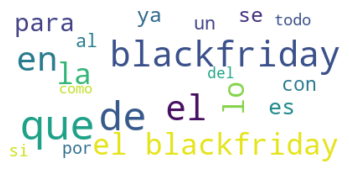

In [ ]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#Convertimos toda la columna Tweet en un string

all_text = " ".join(tweet.lower() for tweet in data_text_clean)
print(all_text)
# Generamos la wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['ver', 'si', 'blackfriday', 'queréis', 'devolverme', 'dinero', 'debéis', 'cuatro', 'meses', 'esperando', 'sigo', 'respuesta', 'fantástico', 'producto', 'belleza', 'blackfriday', 'noviembre', 'huele', 'black', 'friday', '🛒', 'aquí', 'resumimos', 'datos', 'interesantes', 'conducta', 'espera', 'usuarios', 'año', 'abrimos', 'hilo👇', 'blackfriday', 'cybermonday', 'ecommerce', 'comercioelectronico', 'empezó', 'siendo', 'blackfriday', 'convirtieron', 'blackweek', 'año', 'ampliado', 'blackmonth', 'agüita', 'venga', '2021', 'antesala', 'blackyear', 'miscosas', 'dudasexistenciales', 'densidad', 'capilar', 'efecto', 'voluminozador', 'blackfriday', 'peluqueria', 'like', 'vilareal', 'follow', 'claro', 'año', 'compras', 'blackfriday', 'navidad', 'gran', 'porcentaje', 'manera', 'online', 'evitar', 'saturaciones', 'lugares', 'cerrados', 'centros', 'comerciales', 'tradicionales', 'blackfriday', 'v

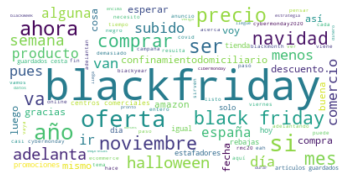

In [ ]:
#Repetimos la operación pero esta vez aplicando el filtro de stopwords

stop_words = set(stopwords.words('spanish')) 
nltk.download('punkt')

# Generate a word cloud image
word_tokens = word_tokenize(all_text)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)
clean_text = " ".join(filtered_sentence)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(clean_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analisis de sentimiento en Castellano (MeaningCloud)

Crea una cuenta para tener el acceso a su API https://www.meaningcloud.com/developer/create-account

En esta sección encontrarás en API key https://www.meaningcloud.com/developer/account/subscriptions

En el siguiente enlace encontrarás la documentación de Sentiment Analysis https://www.meaningcloud.com/developer/sentiment-analysis/doc/2.1/response

El primer paso será instalar la librería con pip

In [ ]:
!pip install meaningCloud-python

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 2.6MB 10.5MB/s 


## Analisis de sentimiento

In [ ]:
print(all_text)

 a ver si para el blackfriday también queréis devolverme el dinero que me debéis más de cuatro meses esperando y sigo sin respuesta   fantástico producto de belleza para el blackfriday noviembre huele a black friday 🛒 aquí resumimos datos interesantes sobre la conducta que se espera de los usuarios este año abrimos hilo👇

blackfriday cybermonday ecommerce comercioelectronico empezó siendo blackfriday  lo convirtieron en blackweek y este año lo han ampliado a blackmonth

agüita con lo que venga en 2021 es la antesala al blackyear 

miscosas dudasexistenciales la densidad capilar con efecto voluminozador

blackfriday peluqueria like vilareal follow está claro que este año las compras del blackfriday y navidad serán en gran porcentaje de manera online para evitar saturaciones y lugares cerrados como los centros comerciales tradicionales el blackfriday va a durar en algunas webs y empresas una semana me parece que el concepto de black friday no lo hemos entendido en españa copiamos todo pe

In [ ]:
#Credits to MeaningCloud Support Team
import tweepy
import pandas as pd
import time
import sys
import meaningcloud

license_key = '40f5e97342550f830d80687573cff9e7'

#cargamos los datos del csv a fetched_tweets
fetched_tweets = pd.read_csv("data_clean.csv")

fetched_tweets = fetched_tweets[0:30] 
print(fetched_tweets.head())
    
try:
        # relacionando text con sentiment 
        sentiment_sum = {'text': [], 'sentiment': []}  
        
        for index, tweet in fetched_tweets.iterrows(): 

            sentiment_response = meaningcloud.SentimentResponse(
            meaningcloud.SentimentRequest(license_key, lang='es', txt=tweet['Tweet'], txtf='plain').sendReq())
            
            #guarda en las listas sentiment_sum cada uno de los valores de parsed_tweet
            parsed_tweet = {}
                
            # almacenamos texto original
            parsed_tweet['text'] =  tweet['Tweet'] #coge sólo la columna 'Tweet'
                
            # almacenamos sentimiento 
            parsed_tweet['sentiment'] = sentiment_response.getGlobalScoreTag() #llama a la función get_tweet_sentiment
                
            #guarda en las listas sentiment_sum cada uno de los valores de parsed_tweet

            sentiment_sum['text'].append(parsed_tweet['text'])
            sentiment_sum['sentiment'].append(parsed_tweet['sentiment'])

            time.sleep(1)

except tweepy.TweepError as e: 
    print("Error : " + str(e))     

#ahora cada uno de nuestros tweets tiene una polaridad asignada
print(sentiment_sum)

   Unnamed: 0                                              Tweet
0           0   A ver si para el blackfriday también queréis ...
1           1   Fantástico producto de belleza para el BlackF...
2           2  Noviembre huele a Black Friday 🛒 Aquí resumimo...
3           3  Empezó siendo BlackFriday  lo convirtieron en ...
4           4  La densidad capilar con efecto voluminozador\n...
{'text': [' A ver si para el blackfriday también queréis devolverme el dinero que me debéis Más de cuatro meses esperando y sigo sin respuesta ', ' Fantástico producto de belleza para el BlackFriday', 'Noviembre huele a Black Friday 🛒 Aquí resumimos datos interesantes sobre la conducta que se espera de los usuarios este año Abrimos hilo👇\n\nblackfriday cybermonday ecommerce comercioelectronico', 'Empezó siendo BlackFriday  lo convirtieron en blackweek y este año lo han ampliado a blackmonth\n\nAgüita con lo que venga en 2021 Es la antesala al blackyear \n\nmiscosas dudasexistenciales', 'La densidad capi

Ahora vamos a añadir la columna 'Sentiment' al DataFrame inicial y vamos a volcar todo el contenido a un nuevo fichero CSV

In [ ]:
df_sentiment = fetched_tweets.assign(sentiment = sentiment_sum['sentiment']) 


In [ ]:
df_sentiment.head(20)

,Unnamed: 0,Tweet,sentiment
0,0,A ver si para el blackfriday también queréis ...,P
1,1,Fantástico producto de belleza para el BlackF...,P+
2,2,Noviembre huele a Black Friday 🛒 Aquí resumimo...,P
3,3,Empezó siendo BlackFriday lo convirtieron en ...,P
4,4,La densidad capilar con efecto voluminozador\n...,NONE
5,5,Está claro que este año las compras del BlackF...,P
6,6,El BlackFriday va a durar en algunas webs y em...,N
7,7,Hará el blackfriday Entrarán las estanterias...,P
8,8,Pronto llega el temido o aclamado BlackFriday ...,N
9,9,Para como es demasiado que ahora está el 25...,N


In [ ]:
del(df_sentiment['Unnamed: 0'])

In [ ]:
print(df_sentiment.head(2))

                                               Tweet sentiment
0   A ver si para el blackfriday también queréis ...         P
1   Fantástico producto de belleza para el BlackF...        P+


In [ ]:
print(df_sentiment["Tweet"][6])

El BlackFriday va a durar en algunas webs y empresas UNA SEMANA Me parece que el concepto de black FRIDAY no lo hemos entendido En España copiamos todo pero versión hacendado


In [ ]:
df_sentiment.to_csv(path_or_buf = "tweet_sentiment.csv", encoding="utf-8")
files.download('tweet_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Representacion de mapa de sentimientos.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
x = le.fit_transform(df_sentiment['sentiment']) 

print(x)

[2 3 2 2 1 2 0 2 0 0 1 1 2 2 3 2 2 3 2 2 2 0 2 3 0 3 2 2 1 0]


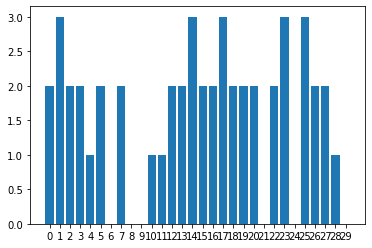

In [ ]:
# library
import matplotlib.pyplot as plt
import numpy as np

# Make a fake dataset:
height = x
bars = df_sentiment.index
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

